https://vbxf.github.io/cmps6160/

https://github.com/vbxf/cmps6160
# Jiangpeng Liu
# Sustainable energy as a better alternative
In this project, I will be analyzing whether transitioning to renewable energy sources which decreases CO2 emission positively impacts global human development. The primary goal is to find if there is a positive correlation between the increase of renewable energy and the index that represents human development. I also try to clear some common misconceptions that people have against sustainable energy.

## Why sustainable energy
I got interested in sustainable energy after I saw from an [article](https://www.energy.gov/eere/solar/articles/2030-solar-cost-targets) from the department of energy where they are saying the cost of solar panels are expected to reduce by half before 2030. I also heard many people saying that the green energy is not actually green. Like the article called "[Green energy isn’t really green, geologist explains](https://www.oklahoman.com/story/business/columns/2019/04/17/green-energy-isnt-really-green-geologist-explains/60461013007/)" Therefore, I like to know how green is renewable energy.

## Note for running this jupyter notebook
I am using python==3.10  
python==3.12 might not work correctly with neuralprophet package

## Dataset
I found the first dataset from [kaggle](https://www.kaggle.com/datasets/lobosi/c02-emission-by-countrys-grouth-and-population). The dataset contains CO2 emission, power generation, types of power sources, and GDP of different Countries. It is a combination of multiple datasets, and the majority of the data is taken from the US Energy Administration. We can use this dataset to answer the question like "Does renewable energy slow down or speed up the growth of GDP?", "Which Country uses the biggest portion of renewable energy", and "Does Countries with higher GDP per capita generate more electricity from clean energy sources?"

### Extraction

In [1]:
import pandas as pd
energy = pd.read_csv('data/energy.csv')
energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
0,0,World,all_energy_types,1980,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547000,4946.627130
1,1,World,coal,1980,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547000,1409.790188
2,2,World,natural_gas,1980,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547000,1081.593377
3,3,World,petroleum_n_other_liquids,1980,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547000,2455.243565
4,4,World,nuclear,1980,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
55435,55435,Zimbabwe,coal,2019,0.045064,0.075963,37.620400,1.465420e+04,11.508701,4.482962,4.586869
55436,55436,Zimbabwe,natural_gas,2019,0.000000,0.000000,37.620400,1.465420e+04,11.508701,4.482962,0.000000
55437,55437,Zimbabwe,petroleum_n_other_liquids,2019,0.055498,0.000000,37.620400,1.465420e+04,11.508701,4.482962,4.377890
55438,55438,Zimbabwe,nuclear,2019,NaN,NaN,37.620400,1.465420e+04,11.508701,4.482962,0.000000


### Transformation

As we can see There are two index columns: the default index generated by Pandas and the "Unnamed" index from the original dataset, both index do not give us good understandings of the dataset. Instead of using the default index, we can set the combination of Country and year as the new index. The "Unnamed: 0" column contains no useful information, therefore it will be dropped.

In [2]:
# Identify dtypes
energy.drop(columns=['Unnamed: 0'], inplace=True)
energy.dtypes

Country                         object
Energy_type                     object
Year                             int64
Energy_consumption             float64
Energy_production              float64
GDP                            float64
Population                     float64
Energy_intensity_per_capita    float64
Energy_intensity_by_GDP        float64
CO2_emission                   float64
dtype: object

We can see that every column is correctly identified by pandas therefore we do not need to modify its dtype.
We want to know if the portion of renewable energy has increased over the last 40 years. We can start filter the Country index by "World" variable which represents data for the entire world.

In [3]:
energy_df = energy.set_index(['Country', 'Year']).loc['World', :]

We can take a look at the new dataframe which contains only the data for the entire world.

In [4]:
energy_df.head()

,Energy_type,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission
Year,,,,,,,,
1980,all_energy_types,292.899790,296.337228,27770.910281,4.298127e+06,68.145921,10.547,4946.627130
1980,coal,78.656134,80.114194,27770.910281,4.298127e+06,68.145921,10.547,1409.790188
1980,natural_gas,53.865223,54.761046,27770.910281,4.298127e+06,68.145921,10.547,1081.593377
1980,petroleum_n_other_liquids,132.064019,133.111109,27770.910281,4.298127e+06,68.145921,10.547,2455.243565
1980,nuclear,7.575700,7.575700,27770.910281,4.298127e+06,68.145921,10.547,0.000000


In [5]:
All_production = energy_df.loc[energy_df["Energy_type"] == "all_energy_types"][["Energy_production"]]
nuclear_production = energy_df.loc[energy_df["Energy_type"] == "nuclear"][["Energy_production"]]
renewable_production = energy_df.loc[energy_df["Energy_type"] == "renewables_n_other"][["Energy_production"]]
All_production = All_production.rename(columns= {"Energy_production": "All_energy_production"})
nuclear_production = nuclear_production.rename(columns= {"Energy_production": "nuclear_production"})
renewable_production = renewable_production.rename(columns= {"Energy_production": "renewable_production"})

In [6]:
total_df = All_production.merge(nuclear_production, on="Year").merge(renewable_production, on="Year")
total_df["portion"] = (total_df["nuclear_production"] + total_df["renewable_production"]) / total_df["All_energy_production"]

<Axes: title={'center': 'The portion of renewable energy over the years'}, xlabel='Year'>

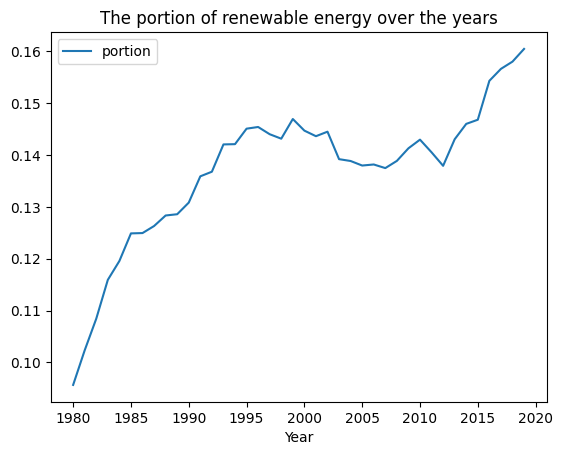

In [7]:
total_df.plot(kind='line', title='The portion of renewable energy over the years', y='portion')

After looking at data for the entire world, we can start asking questions on the individual Country. What are the three countries with the most renewable energy power generation? 
We can filter the dataframe to include only the renewable energy sources in the year of 2019. We also want to drop the rows that has the "World" as a Country name.

In [8]:
highest_renewable = energy.loc[(energy.Year == 2019) & (energy.Energy_type == 'renewables_n_other')][['Country', 'Energy_production']]
highest_renewable = highest_renewable.sort_values("Energy_production", ascending=False)
highest_renewable.drop(highest_renewable[highest_renewable.Country == 'World'].index).head(3)

,Country,Energy_production
54305,China,17.997317
55379,United States,11.595138
54215,Brazil,5.442417


We can see the top three Countries are China, United states, and Brazil

We can also find out how much power generation from renewable energy has increased from 1980 to 2019.

In [9]:
pg = energy.loc[(energy.Country == 'World') & (energy.Energy_type == 'renewables_n_other')]
pg2019 = pg.loc[pg.Year==2019].Energy_production.item()
pg1980 = pg.loc[pg.Year==1980].Energy_production.item()
print("Power generation from renewable power source increased by {:.2f}% from 1980 to 2019".format((pg2019-pg1980)/pg1980*100))

Power generation from renewable power source increased by 239.21% from 1980 to 2019


Another question we can ask is which Country has the highest power generation from nuclear energy in 2019?

In [10]:
highest_nuclear = energy.loc[(energy.Year == 2019) & (energy.Energy_type == 'nuclear')][['Country', 'Energy_production']]
highest_nuclear = highest_nuclear.sort_values("Energy_production", ascending=False)
highest_nuclear.drop(highest_nuclear[highest_nuclear.Country == 'World'].index).head(1)

,Country,Energy_production
55378,United States,8.451852


United States has the highest nuclear energy production.

The general public might not be comfortable with nuclear energy. I believe that after a big nuclear power plant disaster, the growth of nuclear energy will be slowed down. We will prove or disprove this by using Pandas line plot to plot the trend of nuclear energy production from 1980 to 2019

<Axes: xlabel='Year'>

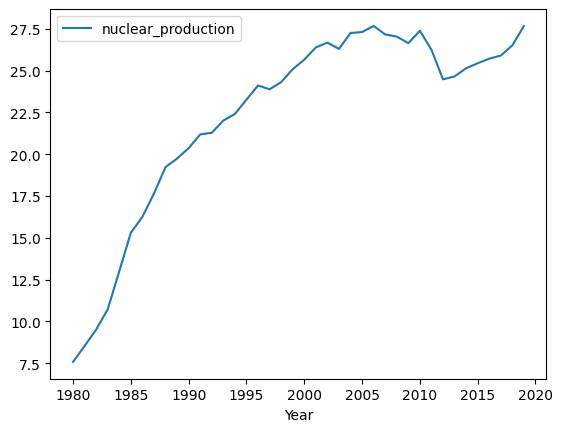

In [11]:
nuclear_production.plot(kind='line')

The most recent nuclear accident was the Fukushima nuclear accident in 2011. As we can see, the nuclear energy production decreased significantly after 2011. We only recovered 2005's nuclear energy production level in 2019. Because of the accident, Germany phased out all nuclear power plants in 2023.

We can also look at how much CO2 emission increased over the last 40 years.

In [12]:
co = energy.loc[(energy.Country == 'World') & (energy.Energy_type == 'all_energy_types')]
co2019 = co.loc[co.Year==2019].CO2_emission.item()
co1980 = co.loc[co.Year==1980].CO2_emission.item()
print("CO2 emission of the entire world increased by {:.2f}% from 1980 to 2019".format((co2019-co1980)/co1980*100))

CO2 emission of the entire world increased by 619.38% from 1980 to 2019


## Additional analysis
Having the energy generation dataset might be enough to solve the problem we want to ask. By exploring the relationship between the CO2 per capita and GDP per capita, we might find that we reach higher GDP per capita level with lower amount of pollution. However, the increase of renewable energy might not be the only factors contributing to this phenomenon. Therefore, I plan to explore more datasets to build a more solid proof.

## Additional datasets
To assess whether transitioning to sustainable energy is advantageous, it's crucial to examine its most significant benefit compared to traditional energy sources: being more environmentally friendly. The air quality index is a good measure of air pollution. The following dataset comes from [kaggle](https://www.kaggle.com/datasets/threnjen/40-years-of-air-quality-index-from-the-epa-yearly) contains 40 years of yearly AQI index sourced from the Environmental Protection Agency. By using this dataset, we can answer question like if the increased adoption of sustainable energy has a positive impact on the air quality.

## Extraction

In [13]:
# Extracting the data and analyzing the data types
aqi = pd.read_csv('data/aqi_yearly.csv')
display(aqi.head(3))
print(len(aqi.columns))
aqi.dtypes

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,...,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Latitude,Longitude
0,Alabama,DeKalb,2021,58,58,0,0,0,0,0,...,42,32,0,0,58,0,0,0,34.289001,-85.970065
1,Alabama,Jefferson,2021,60,33,27,0,0,0,0,...,64,50,1,1,2,0,55,1,33.565278,-86.796389
2,Alaska,Denali,2021,59,59,0,0,0,0,0,...,41,39,0,0,59,0,0,0,63.723200,-148.967600


21


State                                   object
County                                  object
Year                                     int64
Days with AQI                            int64
Good Days                                int64
Moderate Days                            int64
Unhealthy for Sensitive Groups Days      int64
Unhealthy Days                           int64
Very Unhealthy Days                      int64
Hazardous Days                           int64
Max AQI                                  int64
90th Percentile AQI                      int64
Median AQI                               int64
Days CO                                  int64
Days NO2                                 int64
Days Ozone                               int64
Days SO2                                 int64
Days PM2.5                               int64
Days PM10                                int64
Latitude                               float64
Longitude                              float64
dtype: object

The dataset has 21 columns, we only need to look at a few data, so can extract the data we need and drop other columns by selecting the column names. The types of column variables are correctly identified by pandas.

In [14]:
# Cleaning the data
aqi_cleaned = aqi[["Year", "Days with AQI", "Good Days"]]
aqi_cleaned.tail(3)

,Year,Days with AQI,Good Days
34183,2020,366,318
34184,2020,366,323
34185,2020,366,336


We will group the dataset by the year, and rename the column names to avoid confusion, then we will get a dataset containing the percentage of good days using AQI as measure of air pollution from 1980 to 2021. We can merge this with our previous dataset containing the different type of energy

In [15]:
# Grouping the data and find the percentage of good days
aqi_grouped = aqi_cleaned.groupby(['Year']).sum()
aqi_grouped['Percentage of Good Days'] = aqi_grouped['Good Days'] / aqi_grouped['Days with AQI'] * 100
aqi_grouped = aqi_grouped.rename(columns={"Days with AQI": "Days with AQI for all location"})
aqi_grouped = aqi_grouped.rename(columns={"Good Days": "Good Days for all location"})
aqi_grouped.head()

,Days with AQI for all location,Good Days for all location,Percentage of Good Days
Year,,,
1980,143587,77831,54.204768
1981,149784,84275,56.264354
1982,153579,88378,57.545628
1983,160713,92928,57.822329
1984,160542,92070,57.349479


In [16]:
# The difference between the percentage of good days in 2021 and 1981
aqi_grouped.loc[2021]["Percentage of Good Days"] - aqi_grouped.loc[1981]["Percentage of Good Days"]

31.04928247329822

We can see that the percentage of good days increased 31.04% over the last 40 years

One question we could ask ourselves is that if there is a positive correlation between the percentage of sustainable energy and the percentage of the good days monitored.
1. filter for nuclear and renewable energy in dataset
2. combine both values and divide by all_energy_type to get the percentage of sustainable energy
3. merge with our AQI dataset
4. plot scatterplot to see if there is a correlation

In [17]:
# filter for US nuclear and renewable energy and combine them. Divide by all energy to get the portion
renewable_nuclear = energy.loc[(energy.Country == 'United States')
                               & ((energy.Energy_type == 'renewables_n_other')
                                  | (energy.Energy_type == "nuclear"))].set_index('Year')
sustainable = renewable_nuclear.groupby('Year').sum()[['Energy_consumption', 'Energy_production', 'CO2_emission']]
sustainable.Energy_type = 'sustainable'
all_energy = energy.loc[(energy.Country == 'United States') & (energy.Energy_type == 'all_energy_types')].set_index('Year')
sustainable['Sustainable_energy_portion'] = sustainable.Energy_production / all_energy.Energy_production
sustainable.head(2)

/tmp/ipykernel_76457/2217889201.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sustainable = renewable_nuclear.groupby('Year').sum()[['Energy_consumption', 'Energy_production', 'CO2_emission']]


,Energy_consumption,Energy_production,CO2_emission,Sustainable_energy_portion
Year,,,,
1980,8.167511,8.167511,0.0,0.121637
1981,8.421277,8.421277,0.0,0.125861


We can also see from our dataset that CO2_emission for the sustainable energy is 0. It is not accurate because there are still carbon footprint for different types of sustainable energy. However, its carbon footprint is 10-30 times less the tradional power plants.

In [18]:
# Merge aqi and sustainable
energy_aqi = aqi_grouped.merge(sustainable, on='Year')
energy_aqi.head(2)

,Days with AQI for all location,Good Days for all location,Percentage of Good Days,Energy_consumption,Energy_production,CO2_emission,Sustainable_energy_portion
Year,,,,,,,
1980,143587,77831,54.204768,8.167511,8.167511,0.0,0.121637
1981,149784,84275,56.264354,8.421277,8.421277,0.0,0.125861


<Axes: xlabel='Percentage of Good Days', ylabel='Sustainable_energy_portion'>

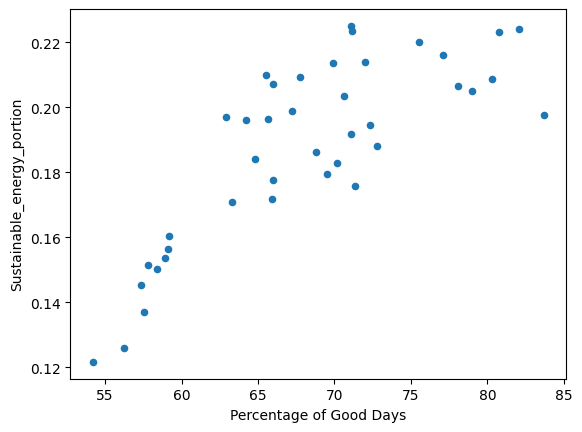

In [19]:
# plot scatter plot on Percentage of Good Days vs Sustainable_energy_portion
energy_aqi.plot.scatter(x='Percentage of Good Days', y='Sustainable_energy_portion')

Looking at the graph, there seem to be a positive correlation between the two variables: portion of sustainable energy and percentage of good days. Next, we can calculate the correlation between these two variables to see if we draw the correct conclusion.

In [20]:
# Correlation between the portion of sustainable energy and the percentage of good days
energy_aqi['Sustainable_energy_portion'].corr(energy_aqi['Percentage of Good Days'])

0.8035293688360604

We get a correlation of 0.80 which represents a strong positive correlation between two variables. The number tells us that we are on the right track. We can print out the correlation matrix using df.corr() function to see if there are other interesting variables for us to look at.

In [21]:
# Correlation matrix
variables = ["Percentage of Good Days", "Energy_consumption", "Energy_production", "Sustainable_energy_portion"]
energy_aqi[variables].corr()

,Percentage of Good Days,Energy_consumption,Energy_production,Sustainable_energy_portion
Percentage of Good Days,1.000000,0.922719,0.922612,0.803529
Energy_consumption,0.922719,1.000000,0.999929,0.902069
Energy_production,0.922612,0.999929,1.000000,0.898568
Sustainable_energy_portion,0.803529,0.902069,0.898568,1.000000


As we can see from the matrix, the percentage of good days has even a stronger correlation with Energy_production. The reason behind this might as we increased the amount of energy produced we found better ways to minimize the carbon footprint.

The energy dataset is very broad because it does not have detailed statistics about different types of sustainable energy. We will look at different datasets that contain the power plants of the world. The [global power plant](https://datasets.wri.org/dataset/globalpowerplantdatabase) dataset was created by the World Resources Institute. It has 35,000 power plants in 167 Countries. There are so many different types of sustainable energy. We might want to know which type of energy was the most popular one, and which type of energy had the most potential.

In [22]:
# Read in the data from csv file
power_plant = pd.read_csv('data/global_power_plant.csv', low_memory=False)
power_plant.head(2)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.119,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.795,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE


In [23]:
# Check the data types of each column
display(power_plant.dtypes)
power_plant.wepp_id.unique()

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

array(['1009793', nan, '1009795', ..., '1033763', '1033856', '1033857'],
      dtype=object)

Pandas identified everything correctly except for wepp_id, which was incorrectly identified as an object. We can use pd.to_numeric to change it back to numbers.

In [24]:
# Change wepp_id to numeric
power_plant['wepp_id'] = pd.to_numeric(power_plant['wepp_id'], errors='coerce')
power_plant.wepp_id.dtypes

dtype('float64')

In [25]:
# Describe the data to get some general information
power_plant.describe()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017
count,34936.000000,34936.000000,34936.000000,17447.000000,1.614400e+04,14887.000000,6417.000000,7226.000000,8203.000000,9144.000000,9500.000000,9637.000000,9659.000000,16120.000000,16503.000000,17050.000000,17570.000000,33138.000000
mean,163.355148,32.816637,-6.972803,1997.414823,6.834034e+05,2018.218849,592.696107,656.863891,762.368840,693.149763,661.834161,517.320785,423.922436,239.112221,242.431122,235.866067,235.695265,716.443378
std,489.636072,22.638603,78.405850,23.397835,4.893219e+05,1.606428,2174.833482,2231.464288,2533.459828,2404.516759,2369.296957,1975.302686,1698.506485,1191.258172,1285.798297,1267.005223,1259.559841,2484.361200
min,1.000000,-77.847000,-179.977700,1896.000000,1.217100e+04,2000.000000,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,-780.339000,1.120000,0.870000,0.440000,0.300000,0.000000
25%,4.900000,29.256475,-77.641550,1988.000000,5.561450e+04,2017.000000,1.947000,2.260000,2.664500,2.729000,2.467000,2.242000,2.751500,8.620000,8.680000,8.380000,8.322500,8.180000
50%,16.745000,39.727750,-2.127100,2007.000000,1.021085e+06,2019.000000,23.426000,23.608500,26.142000,22.462389,17.876500,12.530000,11.530000,27.620000,28.250000,26.830000,27.555000,37.590000
75%,75.344250,46.263125,49.502675,2014.000000,1.066890e+06,2019.000000,199.706000,226.322250,285.862583,249.866750,214.505150,151.117000,122.781498,106.805000,106.980000,103.120000,107.237500,229.565000
max,22500.000000,71.292000,179.388700,2020.000000,1.118187e+06,2019.000000,50834.000000,32320.917000,37433.607000,32377.477000,36448.643000,35136.000000,31920.368000,48675.060000,58470.770000,57113.350000,60859.730000,82810.770000


In [26]:
# Aggregate the data by country and get the sum, mean and count of the capacity_mw.
# Count will be the number of power plants each Country has
power_plant.groupby('country_long').aggregate({'capacity_mw': 
                                               ['sum', 'mean',
                                                 'count']}
                                                )['capacity_mw'].sort_values('sum', ascending=False).head(5)


,sum,mean,count
country_long,,,
China,1415067.380,334.136335,4235
United States of America,1204638.050,122.509717,9833
India,316088.546,198.922936,1589
Russia,228220.050,418.752385,545
Japan,215365.850,412.578257,522


One question we can ask is which type of sustainable energy contributed the most in terms of overall capacity.

In [27]:
power_plant.primary_fuel.unique()
# We need to drop traditional energy sources
traditional_energy = ['Oil', 'Gas', 'Coal', 'Petcoke', 'Waste', 'Cogeneration', 'Biomass']
sustainable_power_plant = power_plant[~power_plant.primary_fuel.isin(traditional_energy)]
sustainable_power_plant.primary_fuel.unique()

array(['Hydro', 'Solar', 'Other', 'Wind', 'Nuclear', 'Wave and Tidal',
       'Geothermal', 'Storage'], dtype=object)

In [28]:
# Sort the sustainable power plants by capacity_mw
sustainable_rank = sustainable_power_plant.groupby('primary_fuel').aggregate({'capacity_mw':['sum']}).sort_values \
                                (('capacity_mw', 'sum'), ascending=False)
sustainable_rank

,capacity_mw
,sum
primary_fuel,
Hydro,1.053160e+06
Nuclear,4.079118e+05
Wind,2.630537e+05
Solar,1.883123e+05
Geothermal,1.268775e+04
Other,3.612860e+03
Storage,1.712300e+03
Wave and Tidal,5.522000e+02


Hydro energy contributed the most, with nuclear energy second. As we previously discussed. The nuclear energy had safety issues, and it was also the reason that some Countries in the world discontinued their nuclear energy programs.

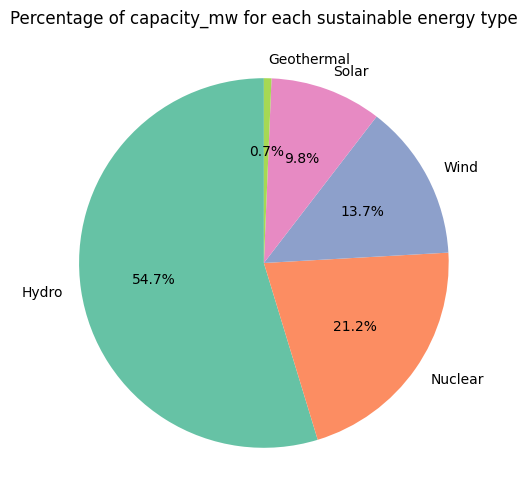

In [29]:
import seaborn as sns
# Ignore future deprication warnings
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

# Calculate the percentage of capacity_mw for each sustainable energy type and get the top 5
sustainable_rank['percentage'] = sustainable_rank['capacity_mw']['sum'] / (sustainable_rank['capacity_mw']['sum'].sum())
top_5 = sustainable_rank.head(5)

# Plot the pie chart using seaborn
plt.figure(figsize=(8, 6))
sns.set_palette("Set2")
plt.pie(x=top_5['percentage'], labels=top_5.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of capacity_mw for each sustainable energy type')
plt.ylabel('')
plt.show()

The graph reveals the top 5 sustainable energy sources: hydro, nuclear, wind, solar, and geothermal. This information can be valuable for making policy decisions, such as determining which energy sources to prioritize.

primary_fuel,Geothermal,Hydro,Nuclear,Other,Solar,Storage,Wave and Tidal,Wind
generation_gwh_2013,15179.82508,372793.281701,7.733500e+05,1337.944050,8832.921488,2660.057995,0.0,173362.881748
generation_gwh_2014,15578.90900,416425.784953,8.103716e+05,1111.788140,16985.995408,1656.477961,0.0,189718.724090
generation_gwh_2015,16576.00500,467117.189793,1.433099e+06,2763.283570,27070.857324,108.833000,0.0,206535.638741
generation_gwh_2016,16927.95800,549077.771389,1.476810e+06,2729.496131,38929.910656,109.624000,0.0,248569.722556
generation_gwh_2017,16187.48900,501114.647545,1.469150e+06,2194.068476,55591.611593,33.810000,0.0,270629.813688


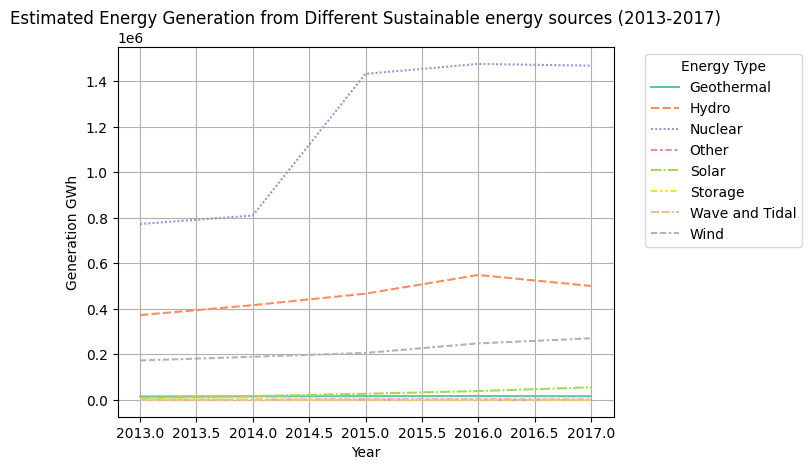

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the aggregated generation_gwh for each sustainable energy type from 2013 to 2017
gen2013_2017 = sustainable_power_plant.groupby('primary_fuel').aggregate({'generation_gwh_2013':'sum',
                                                           'generation_gwh_2014':'sum',
                                                           'generation_gwh_2015':'sum',
                                                           'generation_gwh_2016':'sum',
                                                           'generation_gwh_2017':'sum'})

# Transpose the table
display(gen2013_2017.transpose())
gen2013_2017_t = gen2013_2017.transpose()
# Rename index for readability
gen2013_2017_t.index = [2013, 2014, 2015, 2016, 2017]

# Plot the power plants energy generation from 2013 to 2017 using seaborn
sns.lineplot(data=gen2013_2017_t)
plt.xlabel('Year')
plt.ylabel('Generation GWh')
plt.title('Estimated Energy Generation from Different Sustainable energy sources (2013-2017)')
plt.legend(title='Energy Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


The nuclear energy increased a lot in the 4 years time span. It indicates that this type of energy has a lot of potential. We have to note that there are a lot of missing data especially for hydro power and wave and tidal.

In [31]:
(power_plant.isnull().sum())[-19:]

year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277
generation_data_source            23536
estimated_generation_gwh_2013     18816
estimated_generation_gwh_2014     18433
estimated_generation_gwh_2015     17886
estimated_generation_gwh_2016     17366
estimated_generation_gwh_2017      1798
estimated_generation_note_2013        0
estimated_generation_note_2014        0
estimated_generation_note_2015        0
estimated_generation_note_2016        0
estimated_generation_note_2017        0
dtype: int64

We have a lot of missing data the columns. However the estimated_generation_gwh_2017 only had 1798 power plants' data missing out of 35,000. It can be really helpful in building a model.

Because of the inherent flaws of previous datasets: they do not show that the sustainable power is the major contributor to cleaner environment, I am introducing another dataset from [EPA](https://www.epa.gov/ghgreporting/data-sets). The EPA dataset contains the CO2 emission from all facilities that report to the EPA, therefore we can find out whether the cleaner air is due to tighter regulation or reduced emission from adopting sustainable.

In [32]:
ghg = pd.read_csv('data/ghg.csv')
ghg.head(2)

,REPORTING YEAR,FACILITY NAME,GHGRP ID,LOCATION ADDRESS,CITY NAME,COUNTY NAME,STATE,ZIP CODE,PARENT COMPANIES,GHG QUANTITY (METRIC TONS CO2e),SUBPARTS,SECTOR-SUBSECTOR
0,2010,23RD AND 3RD,1000112,730 3RD AVENUE,BROOKLYN,Kings,NY,11232,New York Power Authority (100%),82960,"C,D",Power Plants-Power Plants
1,2010,29-6 #2 CENTRAL DELIVERY POINT,1006394,NaN,Blanco,Rio Arriba,NM,87412,Williams Partners L.P. (100%),25177,C (Abbr),Petroleum and Natural Gas Systems-Other Petrol...


In [33]:
# Check the data types of each column
ghg.dtypes

REPORTING YEAR                      int64
FACILITY NAME                      object
GHGRP ID                            int64
LOCATION ADDRESS                   object
CITY NAME                          object
COUNTY NAME                        object
STATE                              object
ZIP CODE                            int64
PARENT COMPANIES                   object
GHG QUANTITY (METRIC TONS CO2e)     int64
SUBPARTS                           object
SECTOR-SUBSECTOR                   object
dtype: object

Pandas correctly identified all dtypes of this dataset. We can start with the sector-subsector column, and use it to filter for power plants. Then get two dataframes: first one with only power plants data and another without power plants. 

In [34]:
ghg.shape
# filter for power plants
power_ghg = ghg[ghg["SECTOR-SUBSECTOR"] == 'Power Plants-Power Plants']
# filter for non-power plant facilities
non_power_ghg = ghg[ghg["SECTOR-SUBSECTOR"] != 'Power Plants-Power Plants']

We will try to find out the trend on the emission of greenhouse gas for power plant and non-power plant sectors. It will be helpful to know if our hypothesis about decreasing CO2 emission with increasing percentage of renewable power is supported by the historical data. We are doing this because some people might ask question like "Did the CO2 emission of renewable energy plants go down only because of tighter regulations?"

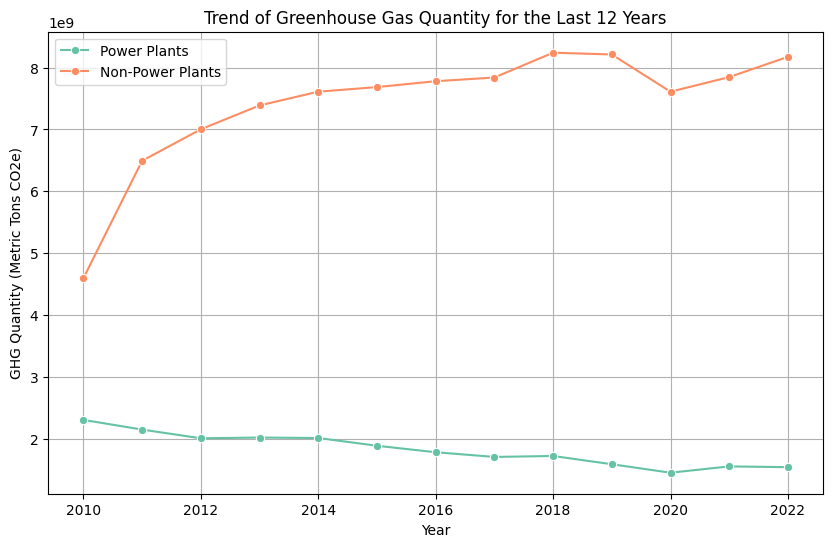

In [35]:
import seaborn as sns

# Group the data by year and get the sum of GHG Quantity
ghg_trend = power_ghg.groupby('REPORTING YEAR')['GHG QUANTITY (METRIC TONS CO2e)'].sum()
non_power_ghg_trend = non_power_ghg.groupby('REPORTING YEAR')['GHG QUANTITY (METRIC TONS CO2e)'].sum()
# Plot the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=ghg_trend, marker='o', label='Power Plants')
sns.lineplot(data=non_power_ghg_trend, marker='o', label='Non-Power Plants')
plt.xlabel('Year')
plt.ylabel('GHG Quantity (Metric Tons CO2e)')
plt.title('Trend of Greenhouse Gas Quantity for the Last 12 Years')
plt.grid(True)
plt.legend()
plt.show()


We can clearly see that the greenhouse gas(GHG) for non-power plant sector almost doubled from 4.5 to 8.2 $10^9$ metric tons. On the other side, GHG for power plant sector had decreased by half from 2.3 to 1.5. Therefore, tighter regulation is not a major factor in CO2 emission analysis. 

After the plotting the trend of greenhouse gas from two different sectors, we realize that the power plants sector contributed positively to cleaner air while the non-power plant sector was contributing negatively. Most developped Countries had pledged to become carbon neutral by 2050, the following analysis try to find out if the energy sector will be carbon neutral by 2050

## Hypothesis
There is a negative correlation between the adoption of sustainable energy and CO2 emission



We can use neuralprophet to train our model on time-series data. The neuralprophet was chosen because it is excellent model for forecasting time-series data. It uses holidays, seasons, and trend of data as factors to predict the future data. We should be able to train the model for predicting future CO2 emission on power plants. Because neuralprophet require our dataframe in a specific format. Column which has name 'ds' to be the data column and 'y' column containing the data we try to predict

The equation that neuralprophet use is the following  
$\hat{y_t} =T(t)+S(t)+E(t)+F(t)+A(t)+L(t)$
where,  
$T(t)=$ Trend at time t  
$S(t)=$ Seasonal effects at time t  
$E(t)=$ Event and holiday effects at time t  
$F(t)=$ Regression effects at time t for future-known exogenous variables  
$A(t)=$ Auto-regression effects at time t based on past observations  
$L(t)=$ Regression effects at time t for lagged observations of exogenous variables

In [36]:
from neuralprophet import NeuralProphet
# Group the data by year and get the sum of GHG Quantity
power_byyear = power_ghg.groupby('REPORTING YEAR', as_index=False)['GHG QUANTITY (METRIC TONS CO2e)'].sum()
# Rename the columns for NeuralProphet Year as 'ds' and GHG Quantity as 'y'
power_byyear.rename(columns={'REPORTING YEAR': 'ds', 'GHG QUANTITY (METRIC TONS CO2e)': 'y'}, inplace=True)
# Convert the year to datetime
power_byyear['ds'] = pd.to_datetime(power_byyear['ds'], format='%Y')
# Display the dataframe
power_byyear.head(5)

,ds,y
0,2010-01-01,2303730101
1,2011-01-01,2147044886
2,2012-01-01,2006236319
3,2013-01-01,2017941545
4,2014-01-01,2010633642


In [37]:
model = NeuralProphet()
metrics = model.fit(power_byyear)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 92.308% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 13
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 1000
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (1) is too small than the required number for the learning rate finder (201). The results 

Finding best initial lr:   0%|          | 0/201 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

We want to predict the future 30 years, so we use NeuralProphet.make_future_dataframe to generate future ds(2021-2051) and y for the future ds. We can make a prediction with NeuralProphet.predict()

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 92.308% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 97.674% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 97.674% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS


Predicting: 1it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


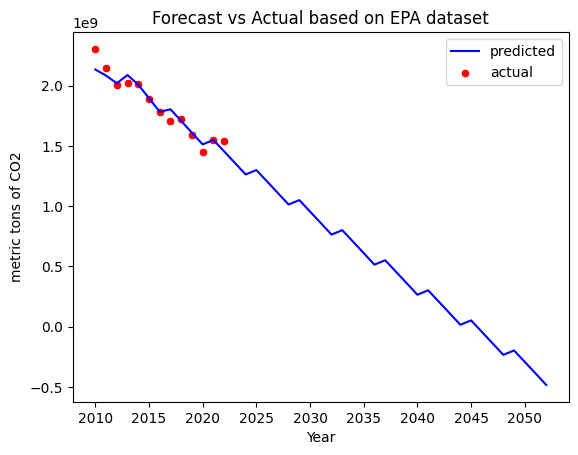

In [38]:
import seaborn as sns

df_future = model.make_future_dataframe(power_byyear, n_historic_predictions=True, periods=30)
forecast = model.predict(df_future)

#plt.figure(figsize=(10, 6))
sns.lineplot(data=forecast, x='ds', y='yhat1', label='predicted', color='blue')
sns.scatterplot(data=power_byyear, x='ds', y='y', label='actual', color='red')
plt.xlabel('Year')
plt.ylabel('metric tons of CO2')
plt.title('Forecast vs Actual based on EPA dataset')
plt.legend()
plt.show()

Based on the EPA dataset's forecast, the power plant sector will become carbon-neutral by year 2051 

Note: The API I use might be expired when you run this notebook. You can get an api easily from https://www.eia.gov/opendata/register.php
I saved the dataframe to csv file in data/eia_emission.csv. I built the parameters for the api using the [EIA API Dashboard](https://www.eia.gov/opendata/browser/co2-emissions/co2-emissions-aggregates).  If you would like to use a different API key, you can substitute the last part of url "api_key=CZdQsisRJzwOfqUWV3jiMPNEx3ZbHcuJ2VQus04i" to your own API key.

In [39]:
import requests
res = requests.get('https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?frequency=annual&data[0]=value&facets[sectorId][]=EC&facets[fuelId][]=TO&start=1970&end=2021&sort[0][column]=period&sort[0][direction]=asc&offset=0&length=5000&api_key=CZdQsisRJzwOfqUWV3jiMPNEx3ZbHcuJ2VQus04i')

Once you have the data, you can use the following code to convert it to a dataframe. First we parse the json object from 'response' $\rightarrow$ 'data'

In [40]:
import json
import os
data = res.json()['response']['data']
d = pd.read_json(json.dumps(data))
file_path = 'data/eia_emission.csv'
# Check if the file already exists
if not os.path.exists(file_path):
    # Save the dataframe to a CSV file
    d.to_csv('data/eia_emission.csv')
d

,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
0,1970,EC,Electric Power carbon dioxide emissions,TO,All Fuels,SD,South Dakota,0.855094,million metric tons of CO2
1,1970,EC,Electric Power carbon dioxide emissions,TO,All Fuels,FL,Florida,42.032100,million metric tons of CO2
2,1970,EC,Electric Power carbon dioxide emissions,TO,All Fuels,ID,Idaho,0.000296,million metric tons of CO2
3,1970,EC,Electric Power carbon dioxide emissions,TO,All Fuels,IL,Illinois,67.779979,million metric tons of CO2
4,1970,EC,Electric Power carbon dioxide emissions,TO,All Fuels,GA,Georgia,20.902089,million metric tons of CO2
...,...,...,...,...,...,...,...,...,...
2699,2021,EC,Electric Power carbon dioxide emissions,TO,All Fuels,GA,Georgia,40.869726,million metric tons of CO2
2700,2021,EC,Electric Power carbon dioxide emissions,TO,All Fuels,FL,Florida,91.232062,million metric tons of CO2
2701,2021,EC,Electric Power carbon dioxide emissions,TO,All Fuels,HI,Hawaii,5.773726,million metric tons of CO2
2702,2021,EC,Electric Power carbon dioxide emissions,TO,All Fuels,ID,Idaho,2.002855,million metric tons of CO2


We will transform our dataset from EIA for the model.

In [41]:
# Group the data by year and get the sum of value
eia_grouped = d.groupby('period').sum().reset_index()
# Rename the columns for NeuralProphet Year as 'ds' and value as 'y'
eia_grouped.rename(columns={'period': 'ds', 'value': 'y'}, inplace=True)
eia_grouped['ds'] = pd.to_datetime(eia_grouped['ds'], format='%Y')
eia_grouped.head(2)

,ds,y
0,1970-01-01,2122.880364
1,1971-01-01,2197.656772


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as YS
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 843
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (4) is too small than the required number for the learning rate finder (204). The results m

Finding best initial lr:   0%|          | 0/204 [00:00<?, ?it/s]

INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.077% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.78% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils._infer_frequency) - Major frequency YS corresponds to 98.78% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - YS
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


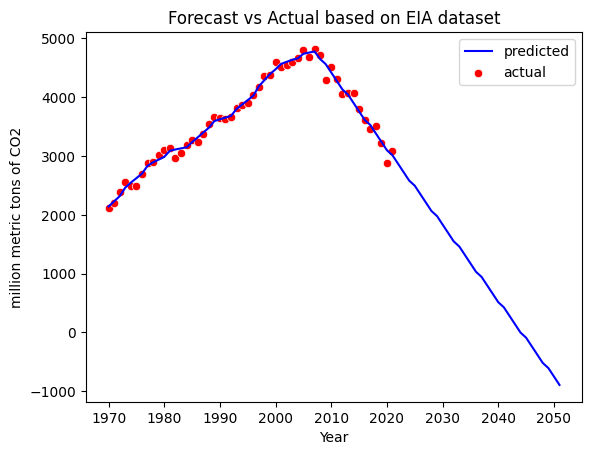

In [42]:
# Initialize the model
m = NeuralProphet()
# Hide the progress for better readability
metrics = m.fit(eia_grouped, progress=None)
df_future = m.make_future_dataframe(eia_grouped, n_historic_predictions=True, periods=30)
# Predict the future
forecast = m.predict(df_future)

# Plot the forecast vs actual
sns.lineplot(data=forecast, x='ds', y='yhat1', label='predicted', color='blue')
sns.scatterplot(data=eia_grouped, x='ds', y='y', label='actual', color='red')
plt.xlabel('Year')
plt.ylabel('million metric tons of CO2')
plt.title('Forecast vs Actual based on EIA dataset')
plt.legend()
plt.show()

Based on the EIA dataset forecast, the power plants will reach carbon-neutral before the year 2047. In conclusion, both datasets suggested that the power plant sector is on the right track. As the share of renewable power plants increases, the CO2 emission decreases

Here, I will introduce another dataset that is very useful for the analysis of sustainable energy. The dataset was downloaded from [kaggle](https://www.kaggle.com/datasets/anshtanwar/global-data-on-sustainable-energy). It contains data from the entire world. A couple useful data included CO2_emission, the electricity access rate by Country, and the percentage of renewable energy from final consumption.

In [43]:
import plotly.express as px
# Filter the data for the year 2019
# Rename the columns for readability
global_data = pd.read_csv('data/global-data-on-sustainable-energy.csv')
global_data.rename(columns={'Value_co2_emissions_kt_by_country': 'CO2_emission',
                            'Access to electricity (% of population)': 'electricity_access',
                            'Renewable energy share in the total final energy consumption (%)': 'renewable_share'}, inplace=True)
df = global_data[global_data['Year'] == 2019]
fig = px.choropleth(df,
                    locations='Entity', 
                    locationmode="country names", 
                    scope="world",
                    color='renewable_share',
                    color_continuous_scale='Bluyl')

# Update the layout for renewable share
fig.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0},
      title_text = 'Renewable percentage in final consumption (2019)',
      title_font_color="black")
fig.show()

As we can see from the graph, most Countries in Africa have a high percentage of renewable power. At the same time, most developped Countries except north european Countries use below 20% of renewable energy. This stark contrast gives us useful insights. A possible explanation could be poorer Countries care about environment more.

In [44]:
fig = px.choropleth(df,
                    locations='Entity', 
                    locationmode="country names", 
                    scope="world",
                    color='electricity_access',
                    color_continuous_scale='Bluyl')

# Update the layout for electricity access
fig.update_layout(
    margin={"r":0,"t":30,"l":0,"b":0},
      title_text = 'Electricity access rate by Country (2019)',
      title_font_color="black")
fig.show()

But the data on electricity access rate offered us a different perspective: the poorer Countries use more sustainable energy because of its affordability. Countries with low electricity access have very limited sources for funding. We have taken a stable power grid as granted. Most people living in the developed Countries do not realise access to electricity is a priviledge to have. For many people in the world, the sustainable energy is the one and the only way they could enjoy electricity. The claim is also supported by news articles. [Bring solar power to africa can end energy poverty](https://time.com/6137298/solar-power-africa/)

In [45]:
global_data.dtypes

Entity                                                          object
Year                                                             int64
electricity_access                                             float64
Access to clean fuels for cooking                              float64
Renewable-electricity-generating-capacity-per-capita           float64
Financial flows to developing countries (US $)                 float64
renewable_share                                                float64
Electricity from fossil fuels (TWh)                            float64
Electricity from nuclear (TWh)                                 float64
Electricity from renewables (TWh)                              float64
Low-carbon electricity (% electricity)                         float64
Primary energy consumption per capita (kWh/person)             float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)    float64
CO2_emission                                                   float64
Renewa

In [46]:
global_data.dtypes

Entity                                                          object
Year                                                             int64
electricity_access                                             float64
Access to clean fuels for cooking                              float64
Renewable-electricity-generating-capacity-per-capita           float64
Financial flows to developing countries (US $)                 float64
renewable_share                                                float64
Electricity from fossil fuels (TWh)                            float64
Electricity from nuclear (TWh)                                 float64
Electricity from renewables (TWh)                              float64
Low-carbon electricity (% electricity)                         float64
Primary energy consumption per capita (kWh/person)             float64
Energy intensity level of primary energy (MJ/$2017 PPP GDP)    float64
CO2_emission                                                   float64
Renewa

Every dtype is correctly identified except for Density since we are dropping unused columns we can safely ignore it.

In [47]:
global_data.corr()

,Year,electricity_access,Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),renewable_share,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),CO2_emission,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Land Area(Km2),Latitude,Longitude
Year,1.000000,0.124890,0.073292,0.104365,0.141820,-0.029384,0.032615,-0.004820,0.073935,0.030126,0.004196,-0.161605,0.024759,0.104767,-0.192566,0.135399,-0.001629,0.003507,0.000944
electricity_access,0.124890,1.000000,0.866554,0.270423,0.060478,-0.784514,0.123999,0.128713,0.138057,-0.151062,0.454870,-0.252949,0.126988,0.058195,-0.112071,0.418459,0.054964,0.420548,-0.102857
Access to clean fuels for cooking,0.073292,0.866554,1.000000,0.227962,0.042204,-0.791740,0.100752,0.163473,0.124486,-0.120110,0.551347,-0.194884,0.095629,0.063131,-0.145301,0.545165,0.074630,0.432700,-0.131847
Renewable-electricity-generating-capacity-per-capita,0.104365,0.270423,0.227962,1.000000,0.003677,0.054821,0.051483,0.080168,0.147768,0.427264,0.000290,-0.056445,0.046755,0.718511,-0.013462,0.017266,0.070355,-0.041691,-0.025587
Financial flows to developing countries (US $),0.141820,0.060478,0.042204,0.003677,1.000000,-0.005519,0.139238,0.127840,0.122362,-0.002716,0.009860,-0.004231,0.126609,-0.023016,0.003324,0.067525,0.141528,0.021782,0.029141
renewable_share,-0.029384,-0.784514,-0.791740,0.054821,-0.005519,1.000000,-0.134888,-0.136525,-0.068779,0.467862,-0.429362,0.247050,-0.132715,0.768166,0.075236,-0.370648,-0.045395,-0.330140,0.018284
Electricity from fossil fuels (TWh),0.032615,0.123999,0.100752,0.051483,0.139238,-0.134888,1.000000,0.646716,0.845067,-0.063773,0.105529,0.030998,0.989741,-0.088586,0.020956,0.107793,0.627682,0.110994,0.045413
Electricity from nuclear (TWh),-0.004820,0.128713,0.163473,0.080168,0.127840,-0.136525,0.646716,1.000000,0.492011,0.071715,0.180833,-0.007496,0.598495,-0.057667,-0.048455,0.231349,0.473280,0.177961,-0.087111
Electricity from renewables (TWh),0.073935,0.138057,0.124486,0.147768,0.122362,-0.068779,0.845067,0.492011,1.000000,0.091451,0.119760,0.009425,0.856270,0.166374,-0.002531,0.139674,0.704884,0.112833,-0.016380
Low-carbon electricity (% electricity),0.030126,-0.151062,-0.120110,0.427264,-0.002716,0.467862,-0.063773,0.071715,0.091451,1.000000,-0.119386,0.047489,-0.054515,0.782388,-0.015196,0.007945,0.044866,-0.029134,-0.045336


We can see that CO2_emission is positively correlated with fossil fuel and negatively correlated with renewable share and Electricity from renewables.

In [48]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import linear_model
import numpy as np
features = ['renewable_share', 'Electricity from renewables (TWh)']

# Drop the unnecessary columns
sus = global_data[['renewable_share', 'Electricity from renewables (TWh)', 'CO2_emission']].dropna()
# Get the data for y variabl,
y = sus['CO2_emission']

# Prepare the data for the model
x = sus[features]

We will first try out the linear regression model and see how it perform

In [49]:
# PolynomialFeatures transformers for the pipeline
scaler = StandardScaler()
# specify the pipeline
model = linear_model.LinearRegression()
pipeline = Pipeline([("transformer", scaler), ("fit", model)])
from sklearn.model_selection import cross_val_score
# cross-validate the model
scores = cross_val_score(pipeline, x, y,
                         cv=5, scoring='neg_mean_squared_error')
scores
display(np.sqrt(np.mean(-scores)))
display(y.std())
pipeline.fit(x, y).score(x, y)

448662.37629582745

778308.1246941548

0.7378097560010461

The linear model gives a good R-squared score but RMSE is high. Next, we will plot a graph based on the percentage of sustainable energy.

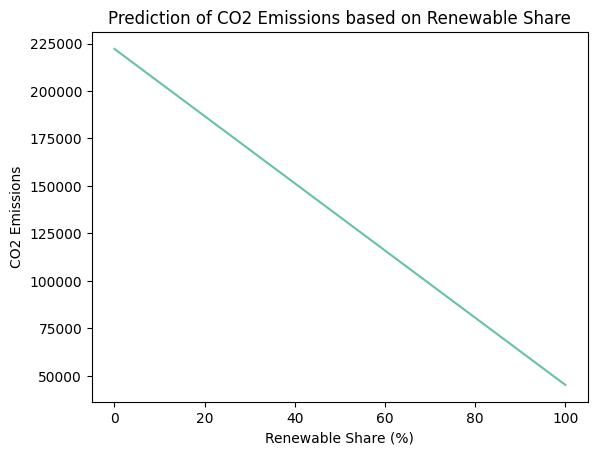

In [50]:
import matplotlib.pyplot as plt

# Plot the predictions
# Generate input values from 0 to 100
X_new = np.array([[i, x["Electricity from renewables (TWh)"].mean()] for i in range(0, 101)])

# Predict the CO2 emissions for each input value
predictions = pipeline.predict(X_new)

# Plot the predictions
plt.plot(range(101), predictions)
plt.xlabel("Renewable Share (%)")
plt.ylabel("CO2 Emissions")
plt.title("Prediction of CO2 Emissions based on Renewable Share")
plt.show()

As you can see from the graph, as the renewable share goes up, the CO2 emission goes down. We will try out polynomial regression model and see if it improves the results

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2)
model = linear_model.LinearRegression()
pipeline = Pipeline([("poly", poly_transformer),("transformer", scaler), ("fit", model)])
# cross-validate the model
scores = cross_val_score(pipeline, x, y,
                         cv=5, scoring='neg_mean_squared_error')
scores
display(np.sqrt(np.mean(-scores)))
display(y.std())
pipeline.fit(x, y).score(x, y)

582921.6826532043

778308.1246941548

0.8578483612974497

The polynomial regression model gives better R-squred but higher RMSE. We will plot the prediction again

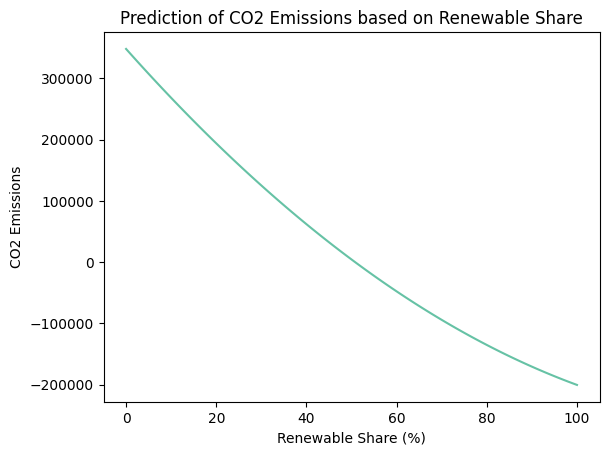

In [52]:
# Plot the predictions
# Generate input values from 0 to 100
X_new = np.array([[i, x["Electricity from renewables (TWh)"].mean()] for i in range(0, 101)])

# Predict the CO2 emissions for each input value
predictions = pipeline.predict(X_new)

# Plot the predictions
plt.plot(range(101), predictions)
plt.xlabel("Renewable Share (%)")
plt.ylabel("CO2 Emissions")
plt.title("Prediction of CO2 Emissions based on Renewable Share")
plt.show()

As you can see from this graph the CO2 emission decreased much more rapidly than the linear regression model

## Conclusion
I found that sustainable energy is prevalent in Countries with low electricity access. We can infer it is cheaper and more accessible to poorer Countries while the traditional power plants require high initial investment. The conclusion we can make from the model was sustainable energy decreased CO2 emission. **The green energy is actually green.**